In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.sparse import lil_matrix
from tqdm import tqdm

In [2]:
def evaluate_index(combinations, state_slice):
    return np.where((combinations == state_slice).all(axis=1))[0][0]

def KCA(N, K, t, p):
    
    state = np.random.choice([-1, 1], size=N, p=[0.5, 0.5])
    state_p = np.copy(state)
    state_p[N//2] *= -1
    
    f = np.random.choice([-1, 1], size=2**(2*K + 1), p=[1-p, p])
    
    arr = [state]
    srr = [state_p]
    
    for j in tqdm(range(t)):
        
        state_new = np.zeros(N)
        state_new_p = np.zeros(N)
        
        for i in range(N):
            
            idx = slice(i-K, i+(K+1))
            state_slice = state[np.mod(np.arange(idx.start, idx.stop, idx.step), N)]
            state_new[i] = f[evaluate_index(combinations, state_slice)]
            
            state_slice_p = state_p[np.mod(np.arange(idx.start, idx.stop, idx.step), N)]
            state_new_p[i] = f[evaluate_index(combinations, state_slice_p)]
        
        state = state_new
        arr.append(state)
        
        state_p = state_new_p
        srr.append(state_p)
    
    arr = np.array(arr)
    srr = np.array(srr)
    
    d = 1/2 * (1 - arr*srr)
    
    return d

In [14]:
N = 2048
K = 4
t = 400

combinations = np.array(list(product([-1, 1], repeat=(2*K+1))))

d = KCA(N, K, t, p=0.40)/n
for i in range(n-1):
    d += KCA(N, K, t, p=0.40)/n
    


100%|█████████████████████████████████████████| 400/400 [07:50<00:00,  1.18s/it]


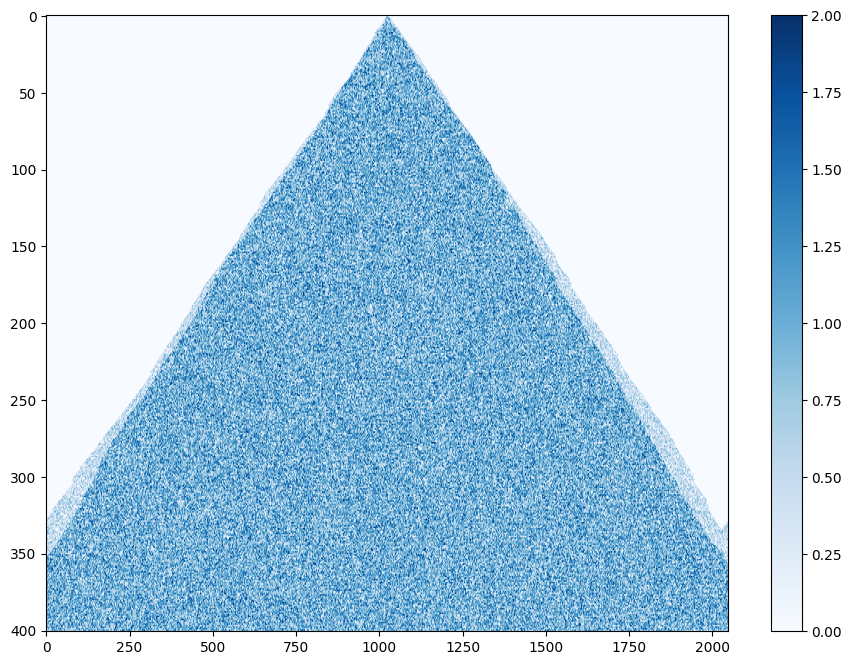

In [13]:
plt.figure(figsize=(11, 8))
plt.imshow(d, aspect='auto', cmap='Blues')
plt.colorbar()
plt.savefig('KCA_lightcone.pdf')